In [3]:
#####Bayesian Rank Decomposition#####
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt
import numpy.matlib
import scipy.linalg
import itertools
import seaborn as sns
from scipy import sparse
from scipy.stats import norm
from pandas.tools.plotting import scatter_matrix
from numpy.random import *
from scipy import optimize

#np.random.seed(98537)

In [10]:
##多項分布の乱数を生成する関数
def rmnom(pr, n, k, no, pattern):
    z_id = np.argmax((np.cumsum(pr, axis=1) >= np.random.uniform(0, 1, n)[:, np.newaxis]), axis=1)
    if pattern==1:
        Z = sparse.coo_matrix((np.repeat(1, n), (no, np.array(z_id))), shape=(n, k))   #スパース行列の設定
        return z_id, Z
    return z_id

In [29]:
####データの発生####
##データの設定
k = 10
select = 10
hh = 5000
member = 250
Lambda = np.random.gamma(30, 1/0.3, hh)
pt = np.random.poisson(Lambda, hh); pt[pt > member] = member
hhpt = np.sum(pt)

In [33]:
##idとインデックスの設定
#idの設定
user_id = np.repeat(np.arange(hh), np.repeat(member, hh))
member_id = np.tile(np.arange(member), hh)

#インデックスの設定
user_list = [i for i in range(hh)]
member_list = [j for j in range(member)]
for i in range(hh):
    user_list[i] = np.array(np.where(user_id==i)[0], dtype="int")
for j in range(member):
    member_list[j] = np.array(np.where(member_id==j)[0], dtype="int")

In [60]:
##応答変数を生成
#ユーザーの説明変数を生成
k1 = 4; k2 = 3; k3 = 4
u1 = np.array(np.random.random(hh*k1)).reshape((hh, k1))
u2 = np.zeros((hh, k2))
for j in range(k2):
    prob = np.random.uniform(0.25, 0.55, 1)
    u2[:, j] = np.random.binomial(1, prob, hh)
u3 = np.random.multinomial(1, np.random.dirichlet(np.repeat(3.0, k3), 1).reshape(k3), hh)
u3 = np.delete(u3, np.argmin(np.sum(u3, axis=0)), axis=1)   #冗長な変数の削除
u = np.concatenate((np.repeat(1, hh)[:, np.newaxis], u1, u2, u3), axis=1)
column = u.shape[1]

#階層モデルのパラメータ
alpha_u = np.random.normal(0, 0.4, column*k).reshape(column, k)
alpha_v = np.repeat(0.0, k)
Cov_u = np.diag(np.repeat(0.2, k))
Cov_v = np.diag(np.repeat(0.6, k))
alphat = alpha.copy(); Covt = Cov.copy()

#モデルパラメータを生成
beta = np.random.normal(0.5, 1.25, member-1)
theta_u = np.dot(u, alpha) + np.random.multivariate_normal(np.repeat(0, k), Cov, hh)
theta_v = np.random.multivariate_normal(alpha_v, Cov_v, member)
betat = beta.copy(); thetat_u = theta_u.copy(); thetat_v = theta_v.copy()

#全パターンの潜在効用と応答確率を定義
logit = np.append(beta, 0) + np.dot(theta_u, theta_v.T)
logit_exp = np.exp(logit)
Prob = logit_exp / np.sum(logit_exp, axis=1)[:, np.newaxis]

(array([ 560., 1502., 1218.,  782.,  466.,  247.,  129.,   61.,   28.,
           7.]),
 array([0.06205539, 0.14731896, 0.23258254, 0.31784611, 0.40310968,
        0.48837325, 0.57363682, 0.6589004 , 0.74416397, 0.82942754,
        0.91469111]),
 <a list of 10 Patch objects>)

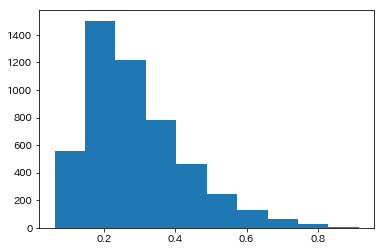